In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import geopandas as gpd 
import statsmodels.api as sm
import statsmodels.formula.api as smf
from time import strptime
import os 
import patsy 
from shapely.wkt import loads
import statsmodels.api as sm
import statsmodels.formula.api as smf
import pickle
import statsmodels.api as sm
import statsmodels.formula.api as smf
import requests 

### Heroin

In [2]:
bg_pkl = open("her_pnml_pkl_030820", 'rb')

her = pickle.load(bg_pkl)

In [3]:
len(her.year_month.unique())

16

In [4]:
#assuming the negative values are wrong
her_df = her[her.pnml>0]

#pnml = mg/day/1000, average heroin user consumes 50 mg/day
her_df['est_users'] = her.pnml * 1/50

#convert to per 10,000 estimate
her_df['est_users'] = her_df['est_users']*10

/Users/drewgobbi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/Users/drewgobbi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [5]:
her_df.drop(['year_month', 'GIDBG', 'OBJECTID', 'Concentration__ng_L__Value',
       'Concentration__ng_L__Error', 'Mass_Load__g_d__Value',
       'Mass_Load__g_d__Error','pnml', 'Population_Normalized_Mass_Lo_1',
       'Shape__Area', 'Shape__Length'] , axis=1, inplace=True)

/Users/drewgobbi/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


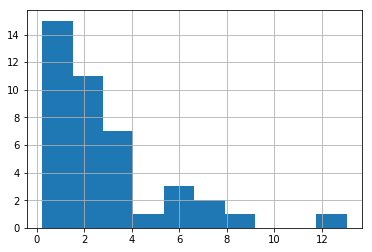

In [6]:
her_df.est_users.hist()

In [7]:
X, y = pd.get_dummies(her_df), her_df.est_users
X.drop(columns='est_users', inplace=True)

In [8]:
res = sm.GLM(y, X, family=sm.families.Poisson()).fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              est_users   No. Observations:                   41
Model:                            GLM   Df Residuals:                       35
Model Family:                 Poisson   Df Model:                            5
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -75.772
Date:                Wed, 18 Mar 2020   Deviance:                       48.050
Time:                        08:05:01   Pearson chi2:                     42.7
No. Iterations:                   100   Covariance Type:             nonrobust
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
pct_Males_ACS_13_17              -0.1189      0.043     -2.747      0.006      -0.204      -0

### Oxycodone

In [9]:
bg_pkl = open("oxy_pnml_pkl_030820", 'rb')

oxy = pickle.load(bg_pkl)

In [10]:
#assuming the negative values are wrong
oxy_df = oxy[oxy.pnml>0]

#pnml = mg/day/1000, average dose user consumes in mg/day
oxy_df['est_users'] = oxy.pnml * 1/10


/Users/drewgobbi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [11]:
oxy_df.drop(['year_month', 'GIDBG', 'OBJECTID', 'Concentration__ng_L__Value',
       'Concentration__ng_L__Error', 'Mass_Load__g_d__Value',
       'Mass_Load__g_d__Error','pnml', 'Population_Normalized_Mass_Lo_1',
       'Shape__Area', 'Shape__Length'] , axis=1, inplace=True)

In [12]:
X, y = pd.get_dummies(oxy_df), oxy_df.est_users
X.drop(columns='est_users', inplace=True)

In [13]:
res = sm.GLM(y, X, family=sm.families.Poisson()).fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              est_users   No. Observations:                   58
Model:                            GLM   Df Residuals:                       52
Model Family:                 Poisson   Df Model:                            5
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -96.445
Date:                Wed, 18 Mar 2020   Deviance:                       15.370
Time:                        08:05:01   Pearson chi2:                     14.7
No. Iterations:                   100   Covariance Type:             nonrobust
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
pct_Males_ACS_13_17              -0.0103      0.017     -0.602      0.547      -0.044       0

### Codine

In [14]:
bg_pkl = open("cod_pnml_pkl_030820", 'rb')

cod = pickle.load(bg_pkl)

In [15]:
#assuming the negative values are wrong
cod_df = cod[cod.pnml>0]

#pnml = mg/day/1000, average dose user consumes in mg/day
cod_df['est_users'] = cod.pnml * 1/30


/Users/drewgobbi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [16]:
cod_df.drop(['year_month', 'GIDBG', 'OBJECTID', 'Concentration__ng_L__Value',
       'Concentration__ng_L__Error', 'Mass_Load__g_d__Value',
       'Mass_Load__g_d__Error','pnml', 'Population_Normalized_Mass_Lo_1',
       'Shape__Area', 'Shape__Length'] , axis=1, inplace=True)

In [17]:
X, y = pd.get_dummies(cod_df), cod_df.est_users
X.drop(columns='est_users', inplace=True)

In [18]:
res = sm.GLM(y, X, family=sm.families.Poisson()).fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              est_users   No. Observations:                   56
Model:                            GLM   Df Residuals:                       50
Model Family:                 Poisson   Df Model:                            5
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -73.236
Date:                Wed, 18 Mar 2020   Deviance:                       17.506
Time:                        08:05:02   Pearson chi2:                     18.3
No. Iterations:                   100   Covariance Type:             nonrobust
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
pct_Males_ACS_13_17               0.0027      0.031      0.086      0.932      -0.059       0

### Fentanyl

In [19]:
bg_pkl = open("fent_pnml_pkl_030820", 'rb')

fent = pickle.load(bg_pkl)

In [20]:
#assuming the negative values are wrong
fent_df = fent[fent.pnml>0]

#pnml = mg/day/1000, average dose user consumes in mg/day
fent_df['est_users'] = fent.pnml * 1/.1


/Users/drewgobbi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [21]:
fent_df.drop(['year_month', 'GIDBG', 'OBJECTID', 'Concentration__ng_L__Value',
       'Concentration__ng_L__Error', 'Mass_Load__g_d__Value',
       'Mass_Load__g_d__Error','pnml', 'Population_Normalized_Mass_Lo_1',
       'Shape__Area', 'Shape__Length'] , axis=1, inplace=True)

In [22]:
X, y = pd.get_dummies(fent_df), fent_df.est_users
X.drop(columns='est_users', inplace=True)

In [23]:
res = sm.GLM(y, X, family=sm.families.Poisson()).fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              est_users   No. Observations:                   55
Model:                            GLM   Df Residuals:                       49
Model Family:                 Poisson   Df Model:                            5
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -435.76
Date:                Wed, 18 Mar 2020   Deviance:                       625.07
Time:                        08:05:02   Pearson chi2:                     804.
No. Iterations:                   100   Covariance Type:             nonrobust
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
pct_Males_ACS_13_17               0.0007      0.009      0.079      0.937      -0.016       0

### Histograms

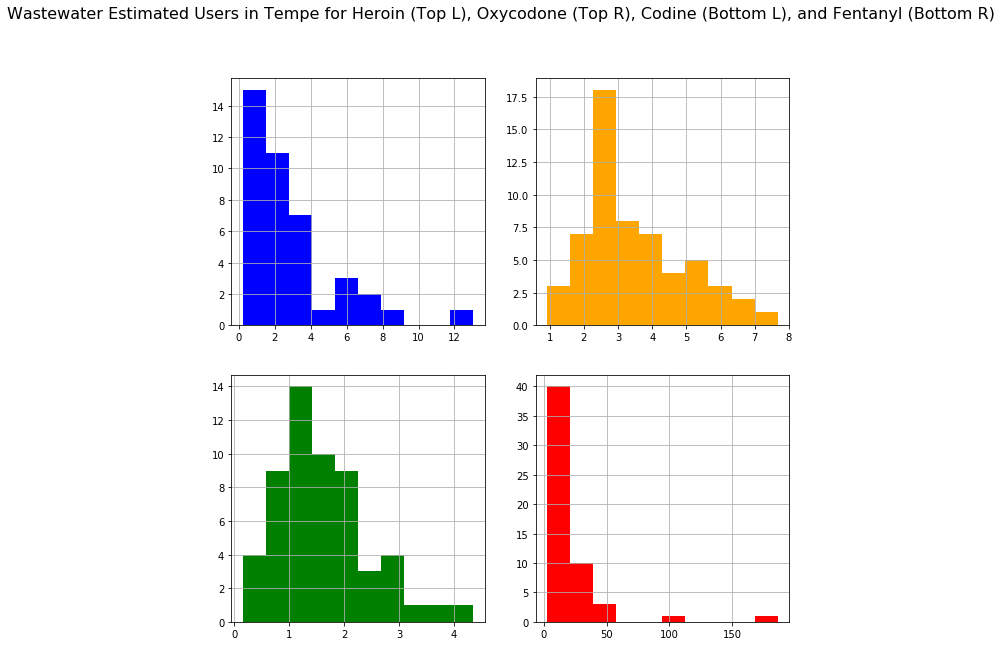

In [24]:
fig, ax = plt.subplots(2,2)
her_df.est_users.hist(ax=ax[0,0], color='blue', figsize=(10,10))
oxy_df.est_users.hist(ax=ax[0,1], color='orange', figsize=(10,10))
cod_df.est_users.hist(ax=ax[1,0], color='green', figsize=(10,10))
fent_df.est_users.hist(ax=ax[1,1], color='red', figsize=(10,10))
plt.suptitle('Wastewater Estimated Users in Tempe for Heroin (Top L), Oxycodone (Top R), Codine (Bottom L), and Fentanyl (Bottom R)', size='16')
plt.savefig('pnml_hist')

